<a href="https://colab.research.google.com/github/PristovaAS/Innopolis/blob/main/ML/%D0%9F%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup as bs

In [3]:
URL_TEMPLATE = "https://meteoinfo.ru/forecasts/russia/republic-tatarstan"
r = requests.get(URL_TEMPLATE)
print(r.status_code)

200


In [4]:
soup = bs(r.text, "html.parser")
citys = soup.find_all('option')

In [5]:
city_keys = {}
for city in citys:
  if 'republic-tatarstan' in str(city):
    data = {}
    d = []
    temp_d = []
    temp_n = []
    precip_d = []
    precip_n = []
    pres_d = []
    pres_n = []
    name = city.text
    link = str(city.get('value')).replace('russia/republic-tatarstan', '')
    r = requests.get(URL_TEMPLATE + link)
    soup_1 = bs(r.text, "html.parser")
    weather_table = soup_1.find_all("td", class_='td_short_gr')
    for weather in weather_table:
      if '<td class="td_short_gr">' in str(weather):
        d.append(str(weather).split('nobr>')[1].replace('</', ''))
      elif '<td bgcolor="#f7f6f5" class="td_short_gr" valign="top"><span>' in str(weather):
        temp_d.append(str(weather).split('span>')[1].replace('</', ''))
      elif '<td bgcolor="#D3D3D3" class="td_short_gr" valign="top"><div class="sdvig_div"><span>' in str(weather):
        temp_n.append(str(weather).split('span>')[1].replace('</', ''))
      elif '<td bgcolor="#f7f6f5" class="td_short_gr" valign="top"><div class="fc_small_gorizont_ww"> <nobr>' in str(weather):
        precip_d.append(str(weather).split('nobr>')[1].replace('</', ''))
      elif '<td bgcolor="#f7f6f5" class="td_short_gr" valign="top"><div class="fc_small_gorizont_ww">7' in str(weather):
        pres_d.append(str(weather).split('>')[2].replace('</div', ''))
      elif '<td bgcolor="#D3D3D3" class="td_short_gr" valign="top"><div class="fc_small_gorizont_ww sdvig_div"> <nobr>' in str(weather):
        precip_n.append(str(weather).split('nobr>')[1].replace('</', ''))
      elif '<td bgcolor="#D3D3D3" class="td_short_gr" valign="top"><div class="fc_small_gorizont_ww sdvig_div">7' in str(weather):
        pres_n.append(str(weather).split('>')[2].replace('</div', ''))
    for i in range(len(d)-1):
      info = []
      info.append((str(temp_d[i]) + '/' + str(temp_n[i])))
      info.append((str(precip_d[i]) + '/' + str(precip_n[i])))
      info.append((str(pres_d[i]) + '/' + str(pres_n[i])))
      data[d[i]] = info
    city_keys[name] = info
print('Done')

Done


In [6]:
print(city_keys)

{'Татарстан республика': ['-1°/-3°', '10.6/4.9', '746/740'], 'Большие Кайбицы': ['0°/-4°', '8.5/3.3', '743/739'], 'Бугульма': ['1°/-1°', '1.5/1.1', '730/724'], 'Елабуга': ['0°/-2°', '6.1/4', '751/744'], 'Казань': ['-1°/-3°', '10.6/4.9', '746/740'], 'Лаишево': ['-1°/-3°', '12.3/5.7', '746/740'], 'Муслюмово I': ['1°/-1°', '3.1/0.6', '752/746'], 'Набережные Челны': ['0°/-2°', '6.1/4', '751/744'], 'Тетюши': ['0°/-3°', '11.6/4', '741/736'], 'Чистополь': ['0°/-2°', '5.5/8.2', '740/735'], 'Чулпаново': ['1°/-2°', '5.6/8.1', '749/744']}


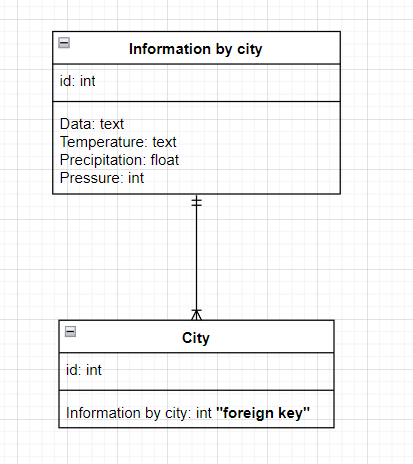